In [17]:
import requests
import pandas as pd
import numpy as np
import uncurl
import subprocess
import pdb
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline  


In [15]:
path2 = "/Users/jackiemartinez/Downloads/discharge15seconds.txt"

In [2]:
import numpy as np
path = "/Users/jackiemartinez/Downloads/gageheight.txt"


In [9]:
##d = np.loadtxt(path2,skiprows=28)

d = pd.read_table(path2, skiprows=26)

In [12]:
df = d[['20d','14n']]
df.columns = ['timestamp','discharge']
df.to_csv("discharge15s.csv")

In [46]:
df = pd.read_csv("gageheight.csv")

In [47]:
df = df[(df['year']==2016) & (df['month']==9.0)&(df['day']>=6.0)&(df['day']<=12.0)].reset_index(drop="true")[['year','month','day','minute','height']]

In [48]:
df['date'] = df.apply(lambda r: str(int(r.year))+"-"+str(int(r.month))+"-"+str(int(r.day)), axis=1)

In [49]:
df.head()

,year,month,day,minute,height,date
0,2016.0,9.0,6.0,15.0,11.95,2016-9-6
1,2016.0,9.0,6.0,30.0,11.94,2016-9-6
2,2016.0,9.0,6.0,45.0,11.92,2016-9-6
3,2016.0,9.0,6.0,60.0,11.91,2016-9-6
4,2016.0,9.0,6.0,75.0,11.89,2016-9-6


In [50]:
df.to_csv("experimentheight.csv")

In [8]:
df = pd.read_table("data/vischer_experiment.txt").drop(0)
df['datetime'] = df.apply(lambda r: parse(r.datetime), axis=1)
lcols = ['year','month','day','hour','minute']
for l in lcols:
    df[l] = df.apply(lambda r: eval("r.datetime."+l),axis=1)
# df = df[(df['year']==2016) & (df['month']==9.0)&(df['day']>=6.0)&(df['day']<=12.0)]
# df.reset_index(drop="true")[['year','month','day','minute','height']]
# df.head()

In [9]:
old_col_name = df.columns[4]
df=df.rename(columns = {old_col_name:'height'})

In [10]:
df = df[(df['year']==2016) & (df['month']==9.0)&(df['day']>=6.0)&(df['day']<=12.0)].reset_index(drop="true")[['year','month','day','minute','height']]
df['date'] = df.apply(lambda r: str(int(r.year))+"-"+str(int(r.month))+"-"+str(int(r.day)), axis=1)
df = df.drop([0,1,2]).reset_index(drop="true")
df.head()

,year,month,day,minute,height,date
0,2016,9,6,15,11.99,2016-9-6
1,2016,9,6,20,11.99,2016-9-6
2,2016,9,6,25,11.98,2016-9-6
3,2016,9,6,30,11.98,2016-9-6
4,2016,9,6,35,11.98,2016-9-6


In [11]:
df.to_csv("data/vischer_experiment_clean.csv")

In [53]:
df = pd.read_table("data/lock8_experiment.txt").drop(0)
df['datetime'] = df.apply(lambda r: parse(r.datetime), axis=1)
lcols = ['year','month','day','hour','minute']
for l in lcols:
    df[l] = df.apply(lambda r: eval("r.datetime."+l),axis=1)
store = df
old_col_name = df.columns[4]
df=df.rename(columns = {old_col_name:'height'})
df['minute'] = df['minute'] + 60*df['hour']
df = df[(df['year']==2016) & (df['month']==9.0)&(df['day']>=6.0)&(df['day']<=12.0)].reset_index(drop="true")[['year','month','day','minute','height']]
df['date'] = df.apply(lambda r: str(int(r.year))+"-"+str(int(r.month))+"-"+str(int(r.day)), axis=1)
df = df.drop([0,1,2]).reset_index(drop="true")
df = df[df['minute'] % 15 == 0]

,year,month,day,minute,height,date
0,2016,9,6,15,12.02,2016-9-6
3,2016,9,6,30,12.01,2016-9-6
6,2016,9,6,45,11.99,2016-9-6
9,2016,9,6,60,11.97,2016-9-6
12,2016,9,6,75,11.95,2016-9-6
15,2016,9,6,90,11.94,2016-9-6
18,2016,9,6,105,11.93,2016-9-6
21,2016,9,6,120,11.92,2016-9-6
24,2016,9,6,135,11.92,2016-9-6
27,2016,9,6,150,11.92,2016-9-6


In [54]:
df = pd.read_table("data/vischer_experiment.txt").drop(0)
df['datetime'] = df.apply(lambda r: parse(r.datetime), axis=1)
lcols = ['year','month','day','hour','minute']
for l in lcols:
    df[l] = df.apply(lambda r: eval("r.datetime."+l),axis=1)
store = df
old_col_name = df.columns[4]
df=df.rename(columns = {old_col_name:'height'})
df['minute'] = df['minute'] + 60*df['hour']
df = df[(df['year']==2016) & (df['month']==9.0)&(df['day']>=6.0)&(df['day']<=12.0)].reset_index(drop="true")[['year','month','day','minute','height']]
df['date'] = df.apply(lambda r: str(int(r.year))+"-"+str(int(r.month))+"-"+str(int(r.day)), axis=1)
df = df.drop([0,1,2]).reset_index(drop="true")
df = df[df['minute'] % 15 == 0]
df.to

In [55]:
df.to_csv("data/lock8_experiment_clean.csv")

In [56]:
df = pd.read_csv("data/lock8_experiment_clean.csv")
df2 = pd.read_csv("data/vischer_experiment_clean.csv")
df3 = pd.read_csv("data/expheight.csv")

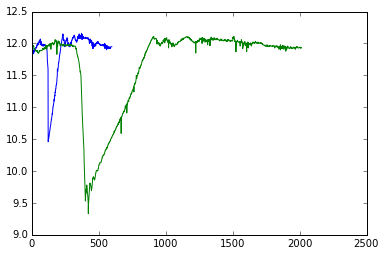

In [57]:
plt.plot(np.arange(df.shape[0]),df.height)
plt.plot(np.arange(df2.shape[0]),df2.height)
# plt.plot(np.arange(df3.shape[0]),df3.height)
